<b>Logistic Regression</b> - Any questions, feel free to contact lc3793@nyu.edu - Calvin


# 1.Dataset Preparation and Visualization

### 1.1 Read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
raw_data = pd.read_csv("./ex2/ex2data2.txt", names = ["Test1","Test2","Accepted"])

In [3]:
raw_data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


### 1.2 Plot Data

In [4]:
def plot_data():
    fig,ax = plt.subplots() #initialize instance: fig, ax
    ax.scatter(raw_data.loc[raw_data.Accepted == 1, "Test1"],
               raw_data.loc[raw_data.Accepted == 1, "Test2"],
               label ="Accepted", marker = "o",c = "b")
    
    ax.scatter(raw_data.loc[raw_data.Accepted == 0,"Test1"],
               raw_data.loc[raw_data.Accepted == 0 , "Test2"],
               label = "Rejected", marker = "x",c = "r")
    ax.legend()
    ax.set(xlabel = "",ylabel = "")
    plt.show()
    

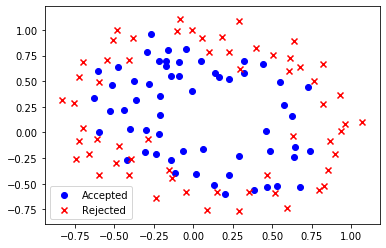

In [5]:
plot_data()

As we can see from the picture, there is no way for us to use a straight line (linear way) to divide the positive and negatives samples here. So what we need to do is to generate some new polynomial terms (feature mapping) to draw a curve to seprate them(<b>decision boundary</b>).

In [6]:
def feature_mapping(x1,x2,power):
    data={}
    for i in range(power + 1):
        for j in range(i + 1):
            data["Feat{0}{1}".format(i-j,j)] = np.power(x1,i-j)*np.power(x2,j) # add all combinations of x1 and x2 here
    return pd.DataFrame(data)

data = feature_mapping(raw_data["Test1"],raw_data["Test2"],6)

In [7]:
data.head()

,Feat00,Feat10,Feat01,Feat20,Feat11,Feat02,Feat30,Feat21,Feat12,Feat03,...,Feat23,Feat14,Feat05,Feat60,Feat51,Feat42,Feat33,Feat24,Feat15,Feat06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [8]:
X = data.values #get array for later computing
X.shape

(118, 28)

In [9]:
y = raw_data.iloc[:,-1].values
y.shape

(118,)

In [10]:
theta = np.zeros(X.shape[1],)
theta.shape

(28,)

Remember always to check the demensions of your array/matrix

# 2. Model Implementation 

In this part, we will build and use all the main functions we need in Logitstic Regression from stretch, which are:
<ul>
<li>Sigmoid Function</li>
<li>Cost Function</li>
<li>Gradient Descent</li>
</ul>       

### 2.1 Sigmoid Function
$$h(z) = \frac{1}{(1 + e^{-z})} $$

In [11]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### 2.2 Cost Function


$$J(\theta) = \frac{1}{m}[-y*log(h(X @ \theta)) - (1-y)*log(1-h(X@\theta))] + \frac{\lambda}{2m}\sum_{j = 1}^n \theta^2_j$$

In [12]:
def costFunction(X,y,theta,Lambda):
    m = len(X)
    
    first = -y *np.log(sigmoid(X@theta))
    second = -(1-y)* np.log(1-sigmoid(X@theta))
    reg = Lambda/(2*m) * (theta[1:] @theta[1:])
    
    J = np.mean(first + second) + reg
    
    return J

In [13]:
costFunction(X,y,theta,Lambda = 1)

0.6931471805599454

### 2.3 Gradient Descent

$$ \frac{\partial J(\theta)}{\partial \theta_j}= (\frac{1}{m} \sum_{i=1}^m (h(X@ \theta) - y)x^{(i)}_j) + \frac{\lambda}{m} \theta_j$$
*Dont forget alpha to control the speed

In [14]:
def gradientDescent(theta,X,y,alpha,iters,Lambda):
# the reason why we put theta as the 1st argument is because scipy.optimize.fmin_tnc required so when we pass a targt function.
    m = len(X)
    costs = []
    min_cost = 1000000
    
    for i in range(iters):
        reg =(Lambda/m)* theta[1:]
        reg = np.insert(reg,0, values = 0, axis =0) #add a row of 0 to avoid penalizaing the theta[0] but keeping the shape when calculating
        theta = theta - alpha * (X.T@(sigmoid(X@theta)-y)) + reg
        cost = costFunction(X,y,theta,Lambda)
        costs.append(cost)        
        if  cost < min_cost:
            min_cost = cost
            best_theta = theta
        
        if i%20000 ==0:
            print(cost)            
    return theta,costs, best_theta

In [15]:
alpha = 0.001
iters = 200000
Lambda = 0.001

In [16]:
theta_final,costs, best_theta =gradientDescent(theta,X,y,alpha,iters,Lambda)

0.6916491228581043
0.3283036348279984
0.3207209345605986
0.31704061996136523
0.3149140239597239
0.3136578924898839
0.3131062749076419
0.31331984158975806
0.314487533822142
0.3168958253281081


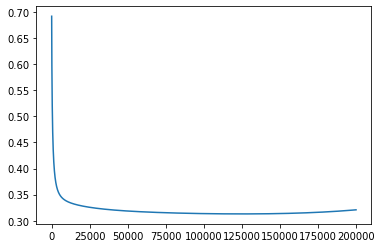

In [17]:
plt.plot([iters for iters in range(200000)], costs)

# 3. Performance Evaluation 

In [18]:
def predict(X,theta):
    prob = sigmoid(X@theta)
    return [1 if x>=0.5 else 0 for x in prob]

In [19]:
y_= np.array(predict(X,best_theta))
y_pred = y_.reshape(len(y_),)
acc= np.mean(y_pred == y)
print("Accuracy is ",acc)

Accuracy is  0.8389830508474576


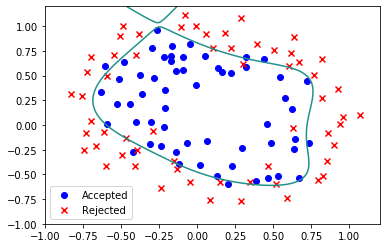

In [21]:
x =np.linspace(-1.0, 1.2 ,200)
xx,yy = np.meshgrid(x,x)
z = feature_mapping(xx.ravel(), yy.ravel(),6).values
zz = z @ theta_final
zz= zz.reshape(xx.shape)
fig,ax = plt.subplots() #initialize instance: fig, ax
ax.scatter(raw_data.loc[raw_data.Accepted == 1, "Test1"],
            raw_data.loc[raw_data.Accepted == 1, "Test2"],
            label ="Accepted", marker = "o",c = "b")
    
ax.scatter(raw_data.loc[raw_data.Accepted == 0,"Test1"],
            raw_data.loc[raw_data.Accepted == 0 , "Test2"],
            label = "Rejected", marker = "x",c = "r")
ax.legend()
ax.set(xlabel = "",ylabel = "")
plt.contour(xx,yy,zz,0)
plt.show()

Now we have a circle that correctly seperates most of the positive and negative samples.  